In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('img_align_celeba')

    # Now perform the following 100 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = '000.%03d.png' % img_i

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))
except:
    #os.rm('img_align_celeba')
    print("You may need to delete the existing 'img_align_celeba' folder in your directory")

You may need to delete the existing 'img_align_celeba' folder in your directory


In [3]:
files = os.listdir('img_align_celeba')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('img_align_celeba', files[0]))
plt.imread(os.path.join('img_align_celeba', files[0]))

files = [os.path.join('img_align_celeba', file_i)
 for file_i in os.listdir('img_align_celeba')
 if '.png' in file_i]

# There should be 100 files, with the last one being number 99

img1 = plt.imread(files[99])
img2 = plt.imread(files[50])
print(img1)
print(img2)

img_align_celeba/000032.png
[[[0.04313726 0.04313726 0.0627451 ]
  [0.3647059  0.37254903 0.39607844]
  [0.8039216  0.8117647  0.8235294 ]
  ...
  [0.07058824 0.09411765 0.1254902 ]
  [0.10588235 0.16470589 0.27450982]
  [0.12156863 0.23137255 0.39607844]]

 [[0.24705882 0.26666668 0.29411766]
  [0.11764706 0.11764706 0.13725491]
  [0.5372549  0.5529412  0.5647059 ]
  ...
  [0.14509805 0.2509804  0.42352942]
  [0.12156863 0.23137255 0.4       ]
  [0.09803922 0.16862746 0.2627451 ]]

 [[0.5647059  0.5803922  0.60784316]
  [0.1882353  0.2        0.22745098]
  [0.23529412 0.25490198 0.2627451 ]
  ...
  [0.09803922 0.16862746 0.29411766]
  [0.10196079 0.16470589 0.2627451 ]
  [0.13333334 0.21568628 0.34901962]]

 ...

 [[0.8235294  0.8392157  0.8509804 ]
  [0.7764706  0.7882353  0.8039216 ]
  [0.72156864 0.7254902  0.7411765 ]
  ...
  [0.54509807 0.49411765 0.41568628]
  [0.5568628  0.50980395 0.4509804 ]
  [0.5686275  0.5294118  0.47058824]]

 [[0.8156863  0.81960785 0.8235294 ]
  [0.7725

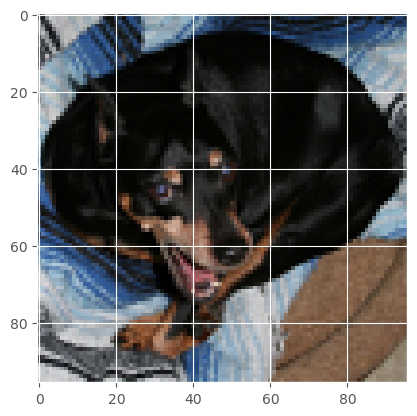

In [4]:
# If nothing is drawn and you are using notebook, try uncommenting the next line:
#%matplotlib inline
plt.imshow(img1)


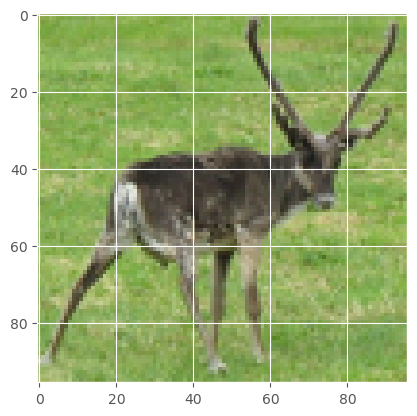

In [5]:
plt.imshow(img2)

In [6]:
img1.shape

(96, 96, 3)

In [7]:
img2.shape

(96, 96, 3)

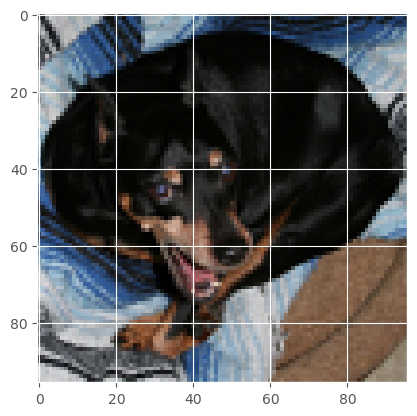

In [8]:
plt.imshow(img1)

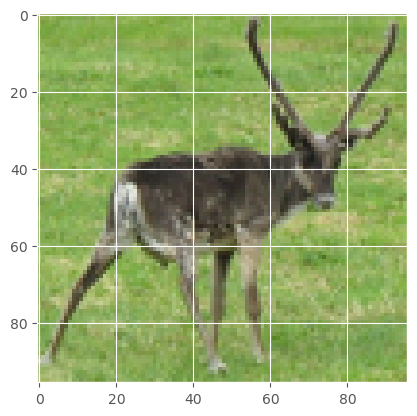

In [9]:
plt.imshow(img2)

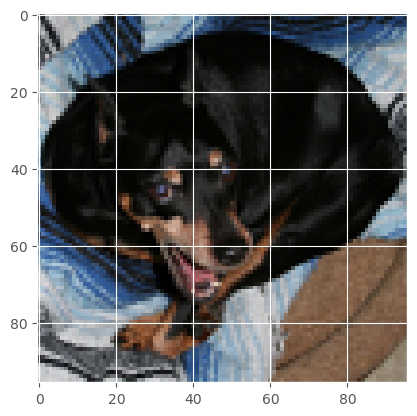

In [10]:
plt.imshow(img1, cmap='gray')

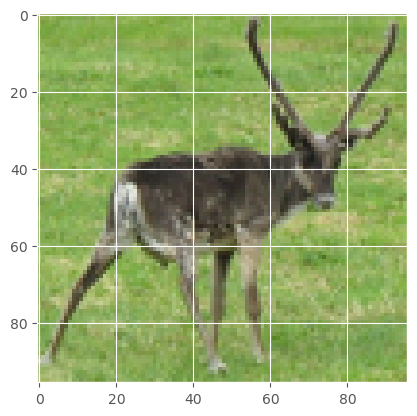

In [11]:
plt.imshow(img2, cmap=plt.cm.gray)

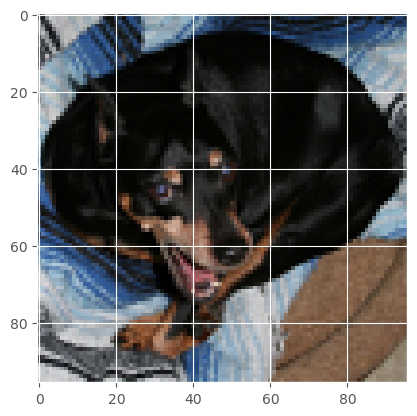

In [12]:
plt.set_cmap('gray')
# or
plt.set_cmap(plt.cm.gray)
# or even
plt.gray()

plt.imshow(img1)

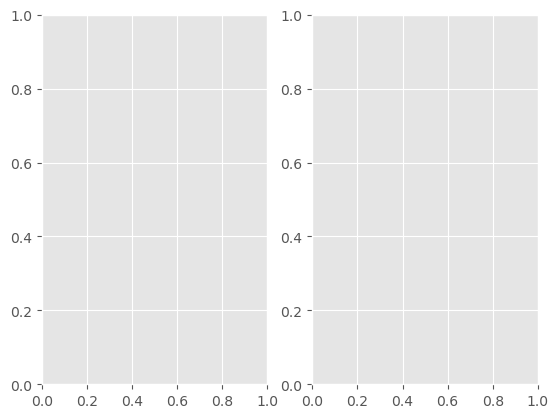

In [13]:
fig, ax = plt.subplots(1, 2)

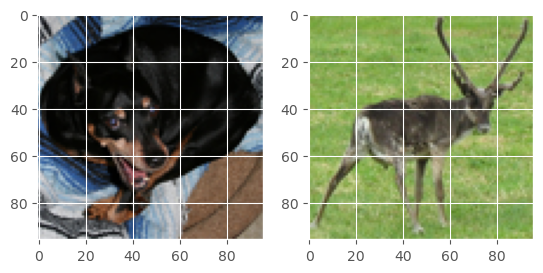

In [14]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [15]:
img1_no_alpha = img1[0:628, 0:500, 0:3]
img1_no_alpha.shape

(96, 96, 3)

In [16]:
img2_no_alpha = img2[0:628, 0:500, 0:3]
img2_no_alpha.shape

(96, 96, 3)

In [17]:
img1_no_alpha = img1[:, :, :2]

In [18]:
img2_no_alpha = img2[:, :, :-1]

In [19]:
np.mean(img1_no_alpha)

0.25729424

In [20]:
img1_gray = np.mean(img1_no_alpha, axis=2)
img1_gray.shape

(96, 96)

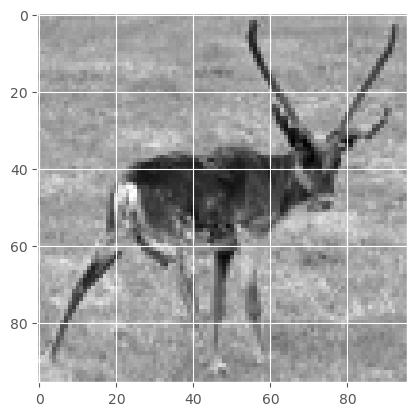

In [21]:
img2_gray = np.mean(img2_no_alpha, axis=2)
plt.imshow(img2_gray)

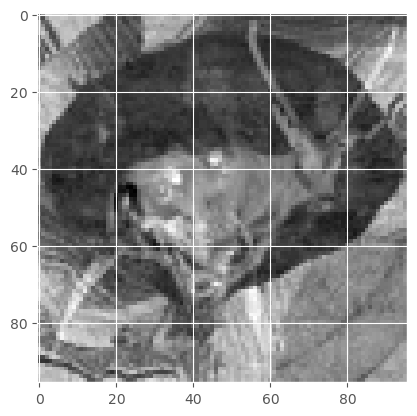

In [22]:
#calculate the difference between the two images
diff = img1_gray - img2_gray
plt.imshow(diff)

In [23]:
(diff.min(), diff.max())

(-0.8745098, 0.44705886)

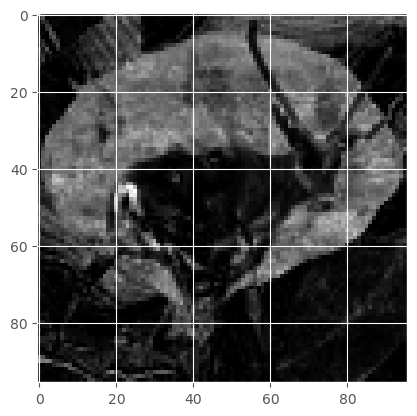

In [24]:
diff_squared = diff**2
plt.imshow(diff_squared)

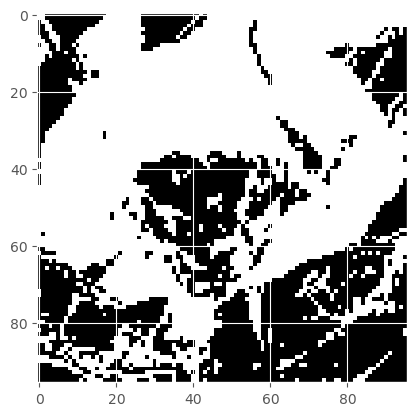

In [25]:
diff_thresholded = diff_squared > 0.05
plt.imshow(diff_thresholded)

In [26]:
diff_thresholded

array([[ True,  True, False, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [27]:
xdim, ydim = img1_gray.shape
img1_gray_3d = np.reshape(img1_gray, (xdim, ydim, 1))
img1_gray_3d.shape

(96, 96, 1)

In [28]:
img1_gray_3d = img1_gray[:, :, None]
img1_gray_3d.shape

(96, 96, 1)

In [29]:
diff_rgb = np.tile(img1_gray_3d, (1, 1, 3))
diff_rgb.shape

(96, 96, 3)

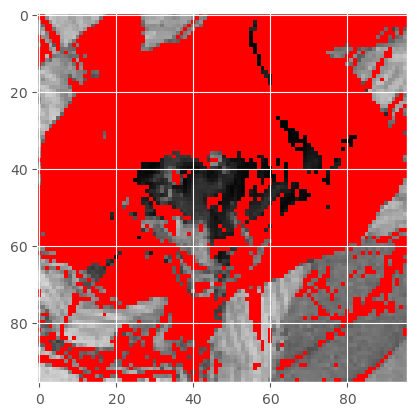

In [30]:
red = [1, 0, 0]
diff_rgb[diff_thresholded, :] = red
plt.imshow(diff_rgb)

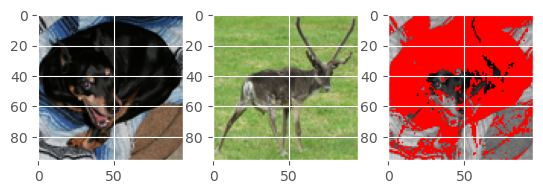

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(diff_rgb)

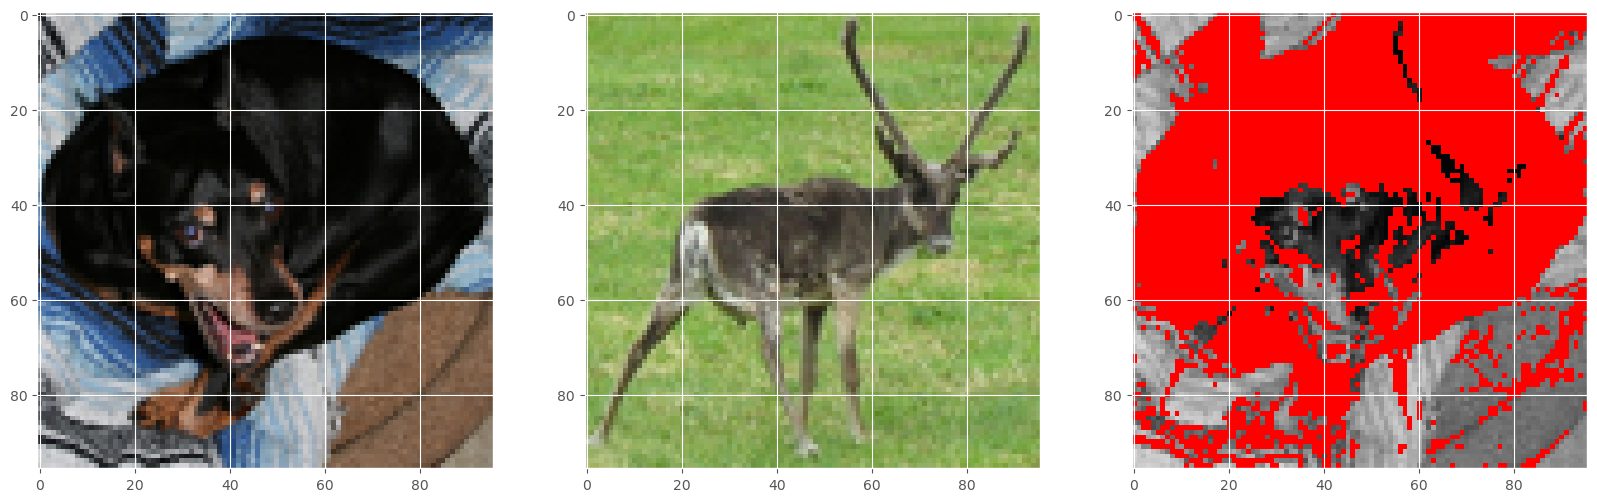

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(diff_rgb)

In [33]:
imgs = [plt.imread(files[file_i])
        for file_i in range(100)]

#imgs = utils.get_celeb_imgs() # nope nope nope

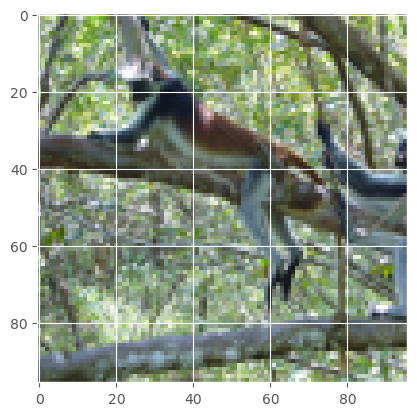

In [34]:
plt.imshow(imgs[59])

In [35]:
data = np.array(imgs) # make 'data' = our numpy array
data.shape
print(data.shape)


(100, 96, 96, 3)


look at this average animals


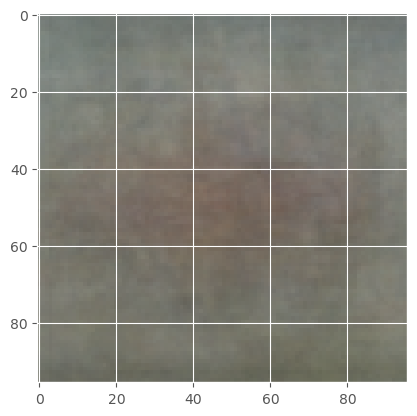

In [36]:
mean_img = np.mean(data, axis=0) # This is the mean of the 'batch' channel
plt.imshow(mean_img)
print("look at this average animals")

In [37]:
mean_img

array([[[0.46054906, 0.48878425, 0.47133335],
        [0.46521556, 0.4902744 , 0.47490197],
        [0.4566666 , 0.48599988, 0.4712941 ],
        ...,
        [0.42929417, 0.4514509 , 0.43552947],
        [0.42945102, 0.45196068, 0.4412157 ],
        [0.4234903 , 0.4436863 , 0.4397255 ]],

       [[0.45701957, 0.48525485, 0.4708627 ],
        [0.45929417, 0.48560786, 0.46976474],
        [0.4577254 , 0.48745096, 0.4698432 ],
        ...,
        [0.4462354 , 0.470902  , 0.46062753],
        [0.4365492 , 0.46011764, 0.45058826],
        [0.44141185, 0.4595687 , 0.45494124]],

       [[0.46666658, 0.49435285, 0.48019603],
        [0.47094113, 0.49835286, 0.4836862 ],
        [0.46098042, 0.48890185, 0.47470587],
        ...,
        [0.4476863 , 0.47454894, 0.46435288],
        [0.4478824 , 0.47325507, 0.46211764],
        [0.45407856, 0.47290206, 0.4688627 ]],

       ...,

       [[0.4190588 , 0.4248626 , 0.3860784 ],
        [0.4222353 , 0.4270588 , 0.38654903],
        [0.41650978, 0

This is the standard deviation - the variance of the mean


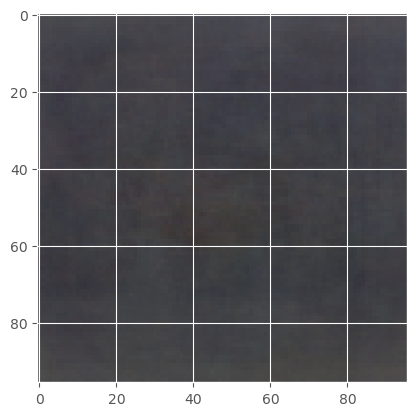

In [38]:
std_img = np.std(data, axis=0)
plt.imshow(std_img)
print("This is the standard deviation - the variance of the mean")

In [39]:
mean_img

array([[[0.46054906, 0.48878425, 0.47133335],
        [0.46521556, 0.4902744 , 0.47490197],
        [0.4566666 , 0.48599988, 0.4712941 ],
        ...,
        [0.42929417, 0.4514509 , 0.43552947],
        [0.42945102, 0.45196068, 0.4412157 ],
        [0.4234903 , 0.4436863 , 0.4397255 ]],

       [[0.45701957, 0.48525485, 0.4708627 ],
        [0.45929417, 0.48560786, 0.46976474],
        [0.4577254 , 0.48745096, 0.4698432 ],
        ...,
        [0.4462354 , 0.470902  , 0.46062753],
        [0.4365492 , 0.46011764, 0.45058826],
        [0.44141185, 0.4595687 , 0.45494124]],

       [[0.46666658, 0.49435285, 0.48019603],
        [0.47094113, 0.49835286, 0.4836862 ],
        [0.46098042, 0.48890185, 0.47470587],
        ...,
        [0.4476863 , 0.47454894, 0.46435288],
        [0.4478824 , 0.47325507, 0.46211764],
        [0.45407856, 0.47290206, 0.4688627 ]],

       ...,

       [[0.4190588 , 0.4248626 , 0.3860784 ],
        [0.4222353 , 0.4270588 , 0.38654903],
        [0.41650978, 0

Mean of all colour channels


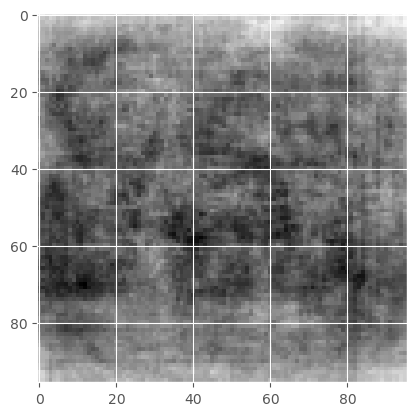

In [40]:
plt.imshow(np.mean(std_img, axis=2)) # Mean of all colour channels
print("Mean of all colour channels")

In [41]:
flattened = data.ravel()
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
print(data[:1])
print(flattened[:10])

[[[[0.27058825 0.3372549  0.1764706 ]
   [0.3137255  0.4        0.19215687]
   [0.29411766 0.3647059  0.16470589]
   ...
   [0.31764707 0.34901962 0.40784314]
   [0.29803923 0.33333334 0.38431373]
   [0.28627452 0.32156864 0.37254903]]

  [[0.2509804  0.32941177 0.15294118]
   [0.35686275 0.40392157 0.2       ]
   [0.36862746 0.47058824 0.2       ]
   ...
   [0.29803923 0.34509805 0.4       ]
   [0.2901961  0.32156864 0.38039216]
   [0.2901961  0.31764707 0.38039216]]

  [[0.33333334 0.39215687 0.20784314]
   [0.35686275 0.42745098 0.2       ]
   [0.3882353  0.47843137 0.18431373]
   ...
   [0.29411766 0.32156864 0.4       ]
   [0.28235295 0.30980393 0.38039216]
   [0.28627452 0.30980393 0.3764706 ]]

  ...

  [[0.20392157 0.20784314 0.2509804 ]
   [0.25882354 0.2627451  0.2901961 ]
   [0.34117648 0.32941177 0.3019608 ]
   ...
   [0.9490196  0.88235295 0.65882355]
   [0.99215686 0.95686275 0.68235296]
   [1.         0.99215686 0.6862745 ]]

  [[0.11764706 0.13333334 0.18039216]
   [0.1

(array([78219.,  5977.,  9400., 10986., 10381., 10034.,  9275.,  8202.,
         7739.,  7709.,  7771.,  8044.,  8404.,  8087.,  8078.,  8008.,
         8349.,  9020.,  9558.,  9409.,  9142.,  9066.,  9152.,  9153.,
         9658.,  9898.,  9816.,  9986.,  9971., 10212., 10379., 10397.,
        10356., 10454., 10195., 10302., 10476., 10508., 10680., 10883.,
        10793., 10794., 11049., 11221., 11579., 11879., 12223., 12981.,
        13496., 12567., 11760., 11719., 11459., 11590., 11287., 11522.,
        11387., 11477., 11526., 11495., 11427., 11376., 11940., 11688.,
        11763., 11683., 11602., 11589., 11622., 11658., 11542., 11534.,
        11851., 11714., 11827., 12035., 12214., 12062., 12114., 12273.,
        12384., 12146., 12172., 12235., 12062., 12190., 11921., 12210.,
        12076., 12127., 12355., 12726., 13184., 13488., 13641., 13371.,
        13255., 12303., 12425., 12145., 12142., 11958., 11675., 11872.,
        11840., 11963., 11732., 11590., 12135., 12171., 12380., 

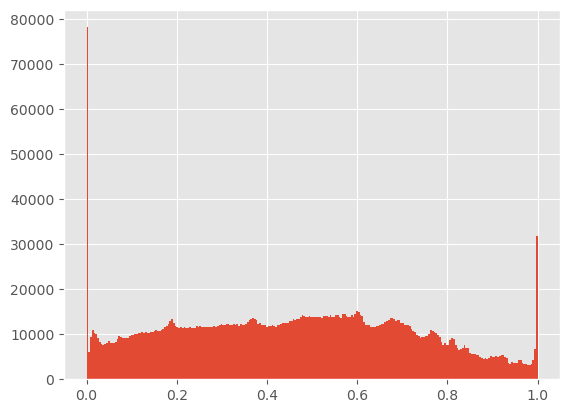

In [42]:
plt.hist(flattened.ravel(), 256)

Text(0.5, 1.0, '(img - mean) distribution')

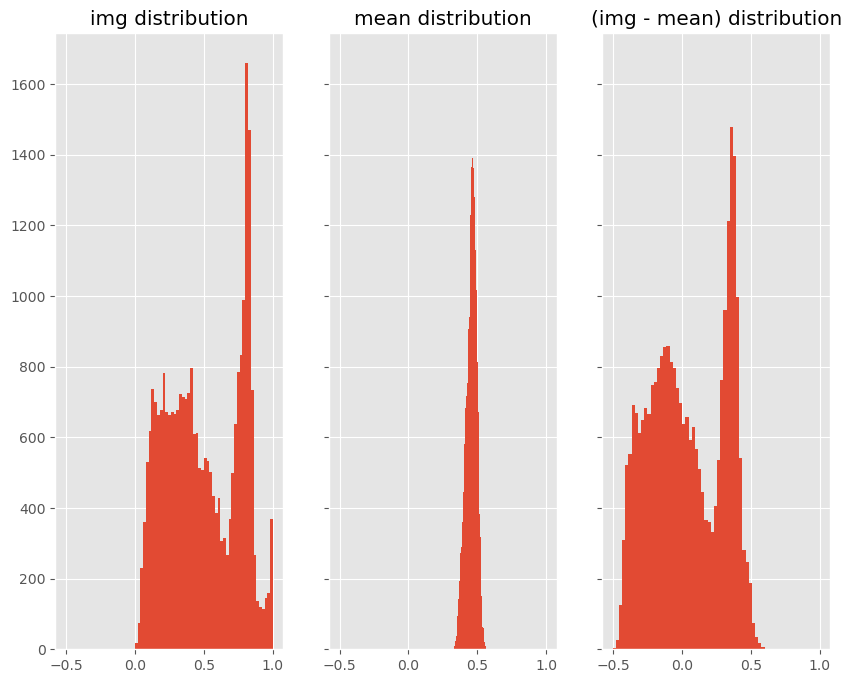

In [43]:
bins = 50
fig, axs = plt.subplots(1, 3, figsize=(10,8), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

Text(0.5, 1.0, '((img - mean) / std_dev) distribution')

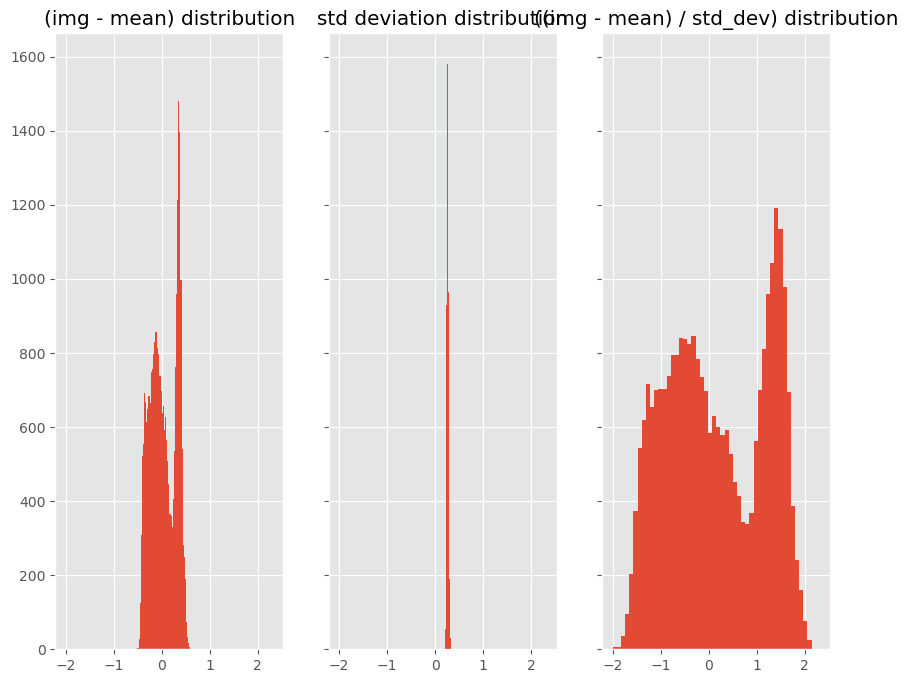

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(10,8), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

In [45]:
axs[2].set_xlim([-100, 100])
axs[2].set_xlim([-50, 50])
axs[2].set_xlim([-20, 20])
axs[2].set_xlim([-5, 5])
axs[2].set_xlim([-1, 1])

(-1.0, 1.0)

In [46]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [47]:
x = np.linspace(-3.0, 3.0, 100)

# Immediately, the result is given to us.  An array of 100 numbers equally spaced from -3.0 to 3.0.
print(x)

# We know from numpy arrays that they have a `shape`, in this case a 1-dimensional array of 100 values
print(x.shape)

# and a `dtype`, in this case float64, or 64 bit floating point values.
print(x.dtype)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [48]:
x = tf.linspace(-3.0, 3.0, 100)
print(x)

Tensor("linspace/Slice:0", shape=(100,), dtype=float32)


In [49]:
g = tf.get_default_graph()

In [50]:
g.get_tensor_by_name('linspace/Slice' + ':0')

<tf.Tensor 'linspace/Slice:0' shape=(100,) dtype=float32>

In [51]:
# We're first going to create a session:
sess = tf.Session()

# Now we tell our session to compute anything we've created in the tensorflow graph.
computed_x = sess.run(x)
print(computed_x)

# Alternatively, we could tell the previous Tensor to evaluate itself using this session:
computed_x = x.eval(session=sess)
print(computed_x)

# We can close the session after we're done like so:
sess.close()

Metal device set to: Apple M1 Max
[-3.         -2.939394   -2.878788   -2.8181818  -2.7575758  -2.6969697
 -2.6363635  -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.3333333
 -2.2727273  -2.2121212  -2.151515   -2.090909   -2.030303   -1.969697
 -1.9090909  -1.8484848  -1.7878788  -1.7272727  -1.6666666  -1.6060605
 -1.5454545  -1.4848485  -1.4242424  -1.3636363  -1.3030303  -1.2424242
 -1.1818181  -1.121212   -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.6969695  -0.6363635  -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.151515
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.2727275   0.3333335   0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.757576    0.818182    0.878788    0.939394
  1.          1.060606    1.121212    1.1818185   1.2424245   1.3030305
  1.3636365   1.4242425   1.4848485   1.5454545   1.606061    1.666667
  1.727273    1.787879    1.848

2023-03-15 04:55:39.928154: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-15 04:55:39.928175: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-15 04:55:39.929618: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-03-15 04:55:39.930120: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-15 04:55:39.930333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [52]:
sess = tf.Session(graph=g)
sess.close()

2023-03-15 04:55:39.942471: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-15 04:55:39.942486: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [53]:
g2 = tf.Graph()

In [54]:
sess = tf.InteractiveSession()
x.eval()

2023-03-15 04:55:39.949281: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-15 04:55:39.949297: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


array([-3.        , -2.939394  , -2.878788  , -2.8181818 , -2.7575758 ,
       -2.6969697 , -2.6363635 , -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.3333333 , -2.2727273 , -2.2121212 , -2.151515  ,
       -2.090909  , -2.030303  , -1.969697  , -1.9090909 , -1.8484848 ,
       -1.7878788 , -1.7272727 , -1.6666666 , -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.4242424 , -1.3636363 , -1.3030303 , -1.2424242 ,
       -1.1818181 , -1.121212  , -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.6969695 , -0.6363635 ,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.151515  , -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.2727275 ,
        0.3333335 ,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.757576  ,  0.818182  ,  0.878788  ,
        0.939394  ,  1.        ,  1.060606  ,  1.121212  ,  1.18

In [55]:
# We can find out the shape of a tensor like so:
print(x.get_shape())

# %% Or in a more friendly format
print(x.get_shape().as_list())

(100,)
[100]


In [56]:
# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Don't worry about trying to learn or remember this formula.  I always have to refer to textbooks or check online for the exact formula.
z = (tf.exp(tf.negative(tf.pow(x - mean, 1.0) /
                   (3.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

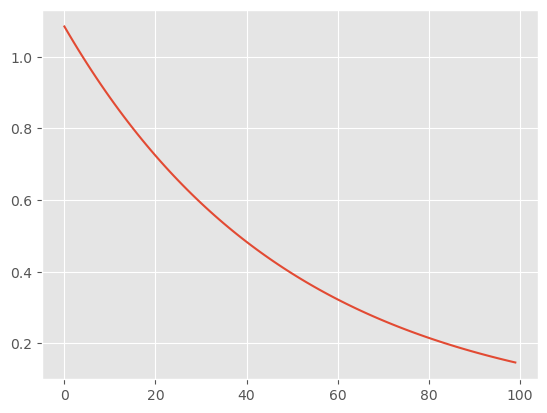

In [57]:
res = z.eval()
plt.plot(res)
# if nothing is drawn, and you are using ipython notebook, uncomment the next two lines:
#%matplotlib inline
#plt.plot(res)

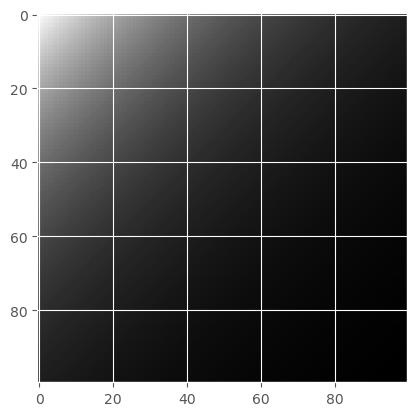

In [58]:
# Let's store the number of values in our Gaussian curve.
ksize = z.get_shape().as_list()[0]

# Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

# Execute the graph
plt.imshow(z_2d.eval())